***
$$\mathbf{\text{Author: Kenneth Kusima}}$$<br>
$$\mathbf{\text{Python MicroKinetics Code}}$$<br>
$$\mathbf{\text{Testing out the Fitting subgroup}}$$<br>
$\mathbf{\text{Date: 08/22}}$<br>
***

In [1]:
from main import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

## Generating files for fitting:

In [2]:
#For Model 1: (without CD) (i.e MKM1)
MKM1 = MKModel('Atomic_1.csv','Stoich_1.csv','Param_1.csv') #Defining the Model
#Intitializations
MKM1.set_initial_coverages(init=[0,0,0]) #Sets the initial coverages of all the surface species (Note: Empty Sites are calculated Automatically. If no option is entered, default initial coverage is zero surface species coverage on the surface)
MKM1.set_rxnconditions() #Sets the Pressures and Temperature as defined from the Param file. (Note: One can also enter them manually - See main.py for syntax)
MKM1.set_limits_of_integration(Ti=0,Tf=6e6)#Sets the reange of time used in integration

sol1,solt1= MKM1.solve_coverage(plot=False) #Coverages
#Creating dataset
MKM1.create_csv(sol1,solt1,Name='coverages_1_nCD.csv',label='coverages') #sol1 = coverages, solt=corresponding time. These awere calculated before from MKM1

Mass is conserved. 

ODE Solver Converged


In [3]:
#For Model 1: (with CD) (i.e MKM1CD)
MKM1CD = MKModel_wCD('Atomic_1.csv','Stoich_1.csv','Param_1.csv') #Defining the Model
#Intitializations
MKM1CD.set_initial_coverages(init=[0,0,0]) #Sets the initial coverages of all the surface species (Note: Empty Sites are calculated Automatically. If no option is entered, default initial coverage is zero surface species coverage on the surface)
MKM1CD.set_rxnconditions() #Sets the Pressures and Temperature as defined from the Param file. (Note: One can also enter them manually - See main.py for syntax)
MKM1CD.set_limits_of_integration(Ti=0,Tf=6e6)#Sets the reange of time used in integration

sol1CD,solt1CD= MKM1CD.solve_coverage(plot=False)

MKM1CD.create_csv(sol1CD,solt1CD,Name='coverages_1_wCD.csv',label='coverages')

Mass is conserved. 

ODE Solver Converged


In [4]:
#For Model 2: (without CD) (i.e MKM2)
MKM2 = MKModel('Atomic_2.csv','Stoich_2.csv','Param_2.csv') #Defining the Model
#Intitializations
MKM2.set_initial_coverages(init=[0.5,0.5,0,0,0,0])
MKM2.set_rxnconditions()
MKM2.set_limits_of_integration(Ti=0,Tf=4e-11)

sol3,solt3= MKM2.solve_coverage(plot=False)

MKM2.create_csv(sol3,solt3,Name='coverages_2_nCD.csv',label='coverages')

Mass is conserved. 

ODE Solver Converged


In [5]:
#For Model 2: (with CD) (i.e MKM2CD)
MKM2CD = MKModel_wCD('Atomic_2.csv','Stoich_2.csv','Param_2.csv')
#Intitializations
MKM2CD.set_initial_coverages(init=[0.5,0.5,0,0,0,0])
MKM2CD.set_rxnconditions()
MKM2CD.set_limits_of_integration(Ti=0,Tf=4e-11)

sol3CD,solt3CD= MKM2CD.solve_coverage(plot=False)

MKM2CD.create_csv(sol3CD,solt3CD,Name='coverages_2_wCD.csv',label='coverages')

Mass is conserved. 

ODE Solver Converged


## Model 1

***
$\mathbf{\text{Micro Kinetic Model for (a Simple 4-Step Mechanism) CO Oxidation}}:$<br>
#### [Link to Relevant Paper](https://pubs.acs.org/doi/10.1021/cs500377j) 
***
$$\require{mhchem}$$       
---
Overall Reaction: 
$$ CO + \frac{1}{2} O_2 {\stackrel{\tiny{\textrm{Pt/Pd}}}{\rightleftharpoons}} CO_2 $$
$Ea = 80kJ{mol}^{-1}->120kJ{mol}^{-1}$
---
Note Reations in the Reaction Mechanism may be reversible or irreversible

Reaction 1:&emsp;Adsorption of CO / Desorption of CO*

$$ CO(g) + * \rightleftharpoons CO^{*} $$  <br> 

Reaction 2:&emsp;Adsorption of $O_2$ / Desorption of $O_2^*$

$$ {O_2}(g) + * \rightleftharpoons {O_2}^{*} $$  <br> 

Reaction 3:&emsp;Dissociation of ${O_2}^*$ / Recombination of O*

$$ {O_2}^* + * \rightleftharpoons 2{O}^* $$  <br> 

Reaction 4:&emsp;Surface Reaction of CO* and ${O_2}^*$ / Adsorption of $CO_2$

$$ {CO}^{*} + {O}^{*} \rightleftharpoons {{CO}_2}(g) + 2* $$  <br> 

***
$\mathbf{\text{Modelling Proposed Reaction Mechanism}}:$<br>
***
${{k_i}^j= \textrm{Rate constant/coefficient for reaction i,}} \\  \hspace{0.5cm} \textrm{for j = {f,r} ; where f = forward reaction and r  = the reverse reaction} \\ r_i = \textrm{Rate of reaction for reaction i}$

${\theta_m = \textrm{Surface Coverage of species m}} \\ \sum_{m=1}^{N} \theta_{m} = 1 \\ \hspace{1.3cm} =
\theta_{CO} + \theta_{O_2} + \theta_{O} + \theta_{*}$

### The Atomic/Species Matrix ($\nu$):

The participating species for this surface reaction mechanism are:
1. CO
2. $O_2$
3. $CO_2$
4. $CO^*$
5. $O^*$
6. ${O_2}^*$
7. *

\begin{equation}
\
\nu=\begin{bmatrix}
    &   CO    &   O_2   &   CO_2  &      CO^*    &     O*     &    O_2^*     &   *\\
C   &   1     &   0     &   1     &      1       &     0      &     0        &   0\\
O   &   1     &   2     &   2     &      1       &     1      &     2        &   0\\
*   &   0     &   0     &   0     &      1       &     1      &     1        &   1\end{bmatrix} 
\
\end{equation}

Atomic Matrix Size : (3x7)
### The Stoichiometric Matrix (A):

\begin{equation}
\
A=\begin{bmatrix}
    & P_{CO} & P_{O_2} & P_{CO_2} & \theta_{CO} & \theta_{O} & \theta_{O_2} &\theta_{*}\\
r_1 &  -1     &   0     &   0     &      1       &     0      &     0        &  -1\\
r_2 &   0     &  -1     &   0     &      0       &     0      &     1        &  -1\\
r_3 &   0     &   0     &   0     &      0       &     2      &    -1        &  -1\\     
r_4 &   0     &   0     &   1     &     -1       &    -1      &     0        &   2\end{bmatrix} 
\
\end{equation}

Stoichiometric Matrix Size : (4x7)

Note:

- For Mass to be conserved:
$$\mathbf{A}\mathbf{\nu = 0}$$

$i =$ species

$j =$ reaction

- To find the Rate of reaction of reaction j:

$$ r_j = k_{j,f} \prod_{i_f} P_{i,f} \theta_{i,f}^{A_{i,j}} - k_{j,r} \prod_{i_r} P_{i,r} \theta_{i,r}^{A_{i,j}}  $$

- To find the Rate of production of species i:
$$R_{\theta_i}=\frac{d\theta_i}{dt} = \sum_j A_{j,i} \cdot r_j $$

#### Therefore:

Rate Equations:&emsp;

$$r_1 = k_{1}^f \cdot \textrm{P}_{CO} \cdot \theta_{*} - k_{1}^r \cdot \theta_{CO} $$

$$r_2 = k_{2}^f \cdot \textrm{P}_{O_2} \cdot \theta_{*} - k_{2}^r \cdot \theta_{O_{2}} $$

$$r_3 = k_{3}^f \cdot \theta_{O_2} \cdot \theta_{*} - k_{3}^r \cdot \theta_{O}^2 $$

$$r_4 = k_{4}^f \cdot \theta_{CO} \cdot \theta_{O} - k_{4}^r \cdot \textrm{P}_{{CO}_2} \cdot \theta_{*}^2 $$

The Corresponding Differential Equations corresponding to the rate of formations/productions of the different coverages:

$$R_{\theta_{CO}} = \frac{d\theta_{CO}}{dt} = r_1 - r_4$$

$$R_{\theta_{O_2}} = \frac{d\theta_{O_2}}{dt} = r_2 - r_3 $$

$$R_{\theta_{O}} = \frac{d\theta_{O}}{dt} = 2 r_3 - r_4 $$

$$R_{\theta_{*}} = \frac{d\theta_{*}}{dt} = 2 r_4 - r_1 - r_2 - r_3 $$



# ----------------------------------------------------------------------------------------

## |--->Without CD

Mass is conserved. 


 Initial guess: 

-> Rate Constants:
 [1.e+00 1.e-09 1.e+02 1.e+05 1.e+08 1.e-02 1.e-06 1.e+02]

 Final predictions: 

-> Rate Constants:
 [1.99997586e+00 6.64998401e-09 2.30999980e+02 4.00788517e+04
 2.13637132e+08 2.13999430e-02 2.84999988e-06 5.00000043e+02]


<IPython.core.display.Javascript object>


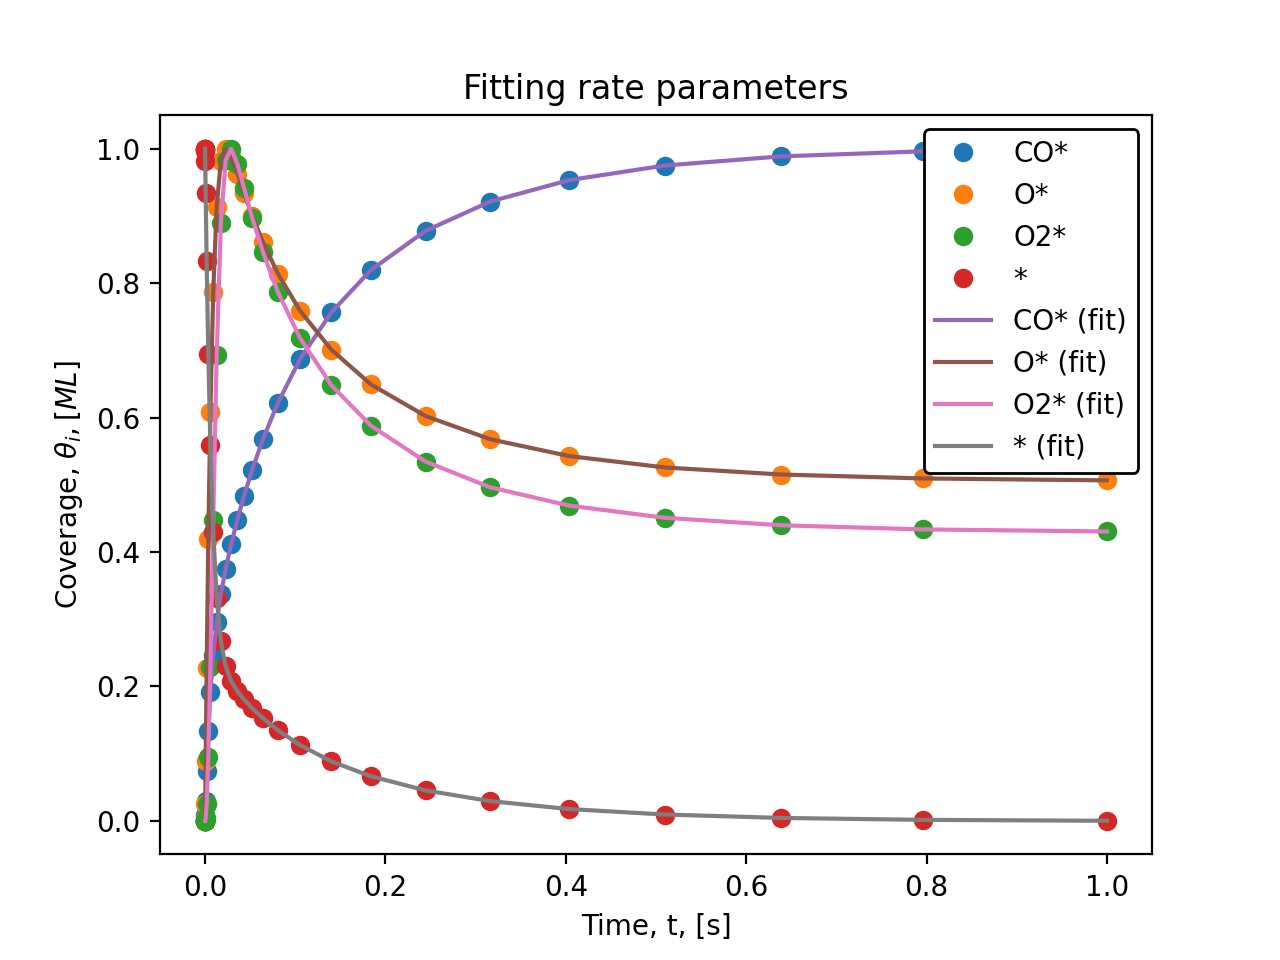

CPU times: user 9min 27s, sys: 32.8 s, total: 10min
Wall time: 7min 54s


In [6]:
%%time 
#Fitting for Model 1: (without CD) #using curve_fit
fit1_a = Fitting('coverages_1_nCD.csv','Atomic_1.csv','Stoich_1.csv','Param_1_Guess.csv',CovgDep=False) #covgdep = Allowing for coverage dependance to be considered in the fit
t1_a,covg1_a,fits1_a = fit1_a.fitting_rate_param(option='cf',plot=True) #cf stands for curve fit

Mass is conserved. 


 Initial guess: 

-> Rate Constants:
 [1.e+00 1.e-09 1.e+02 1.e+05 1.e+08 1.e-02 1.e-06 1.e+02]

 Final predictions: 

-> Rate Constants:
 [6.76961248e+00 2.78633582e-07 9.87461934e+01 1.00000000e+05
 1.00000000e+08 1.00000000e+01 1.07629206e-07 1.03907262e+02]


<IPython.core.display.Javascript object>


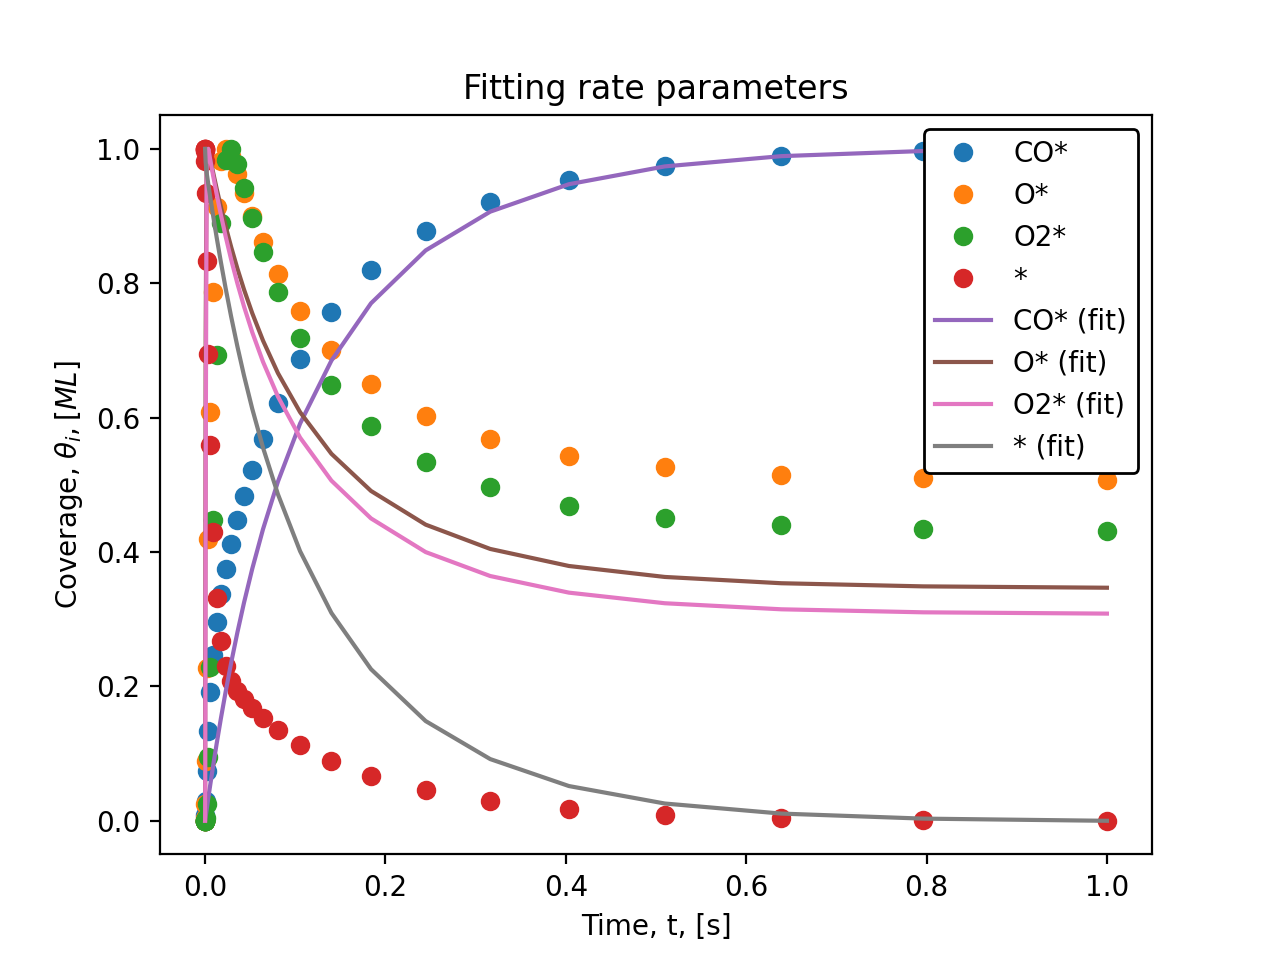

CPU times: user 35.7 s, sys: 93.8 ms, total: 35.8 s
Wall time: 35.7 s


In [7]:
%%time 
#Fitting for Model 1: (without CD) #using function minizer
fit1_b = Fitting('coverages_1_nCD.csv','Atomic_1.csv','Stoich_1.csv','Param_1_Guess.csv',CovgDep=False) #covgdep = Allowing for coverage dependance to be considered in the fit
t1_b,covg1_b,fits1_b = fit1_b.fitting_rate_param(option='min',plot=True) #min stands for minimize

Mass is conserved. 


 Initial guess: 

-> Rate Constants:
 [1.e+00 1.e-09 1.e+02 1.e+05 1.e+08 1.e-02 1.e-06 1.e+02]

 Final predictions: 

-> Rate Constants:
 [1.932e+00 1.932e-09 1.932e+02 1.932e+05 1.932e+08 1.932e-02 1.932e-06
 1.932e+02]


<IPython.core.display.Javascript object>


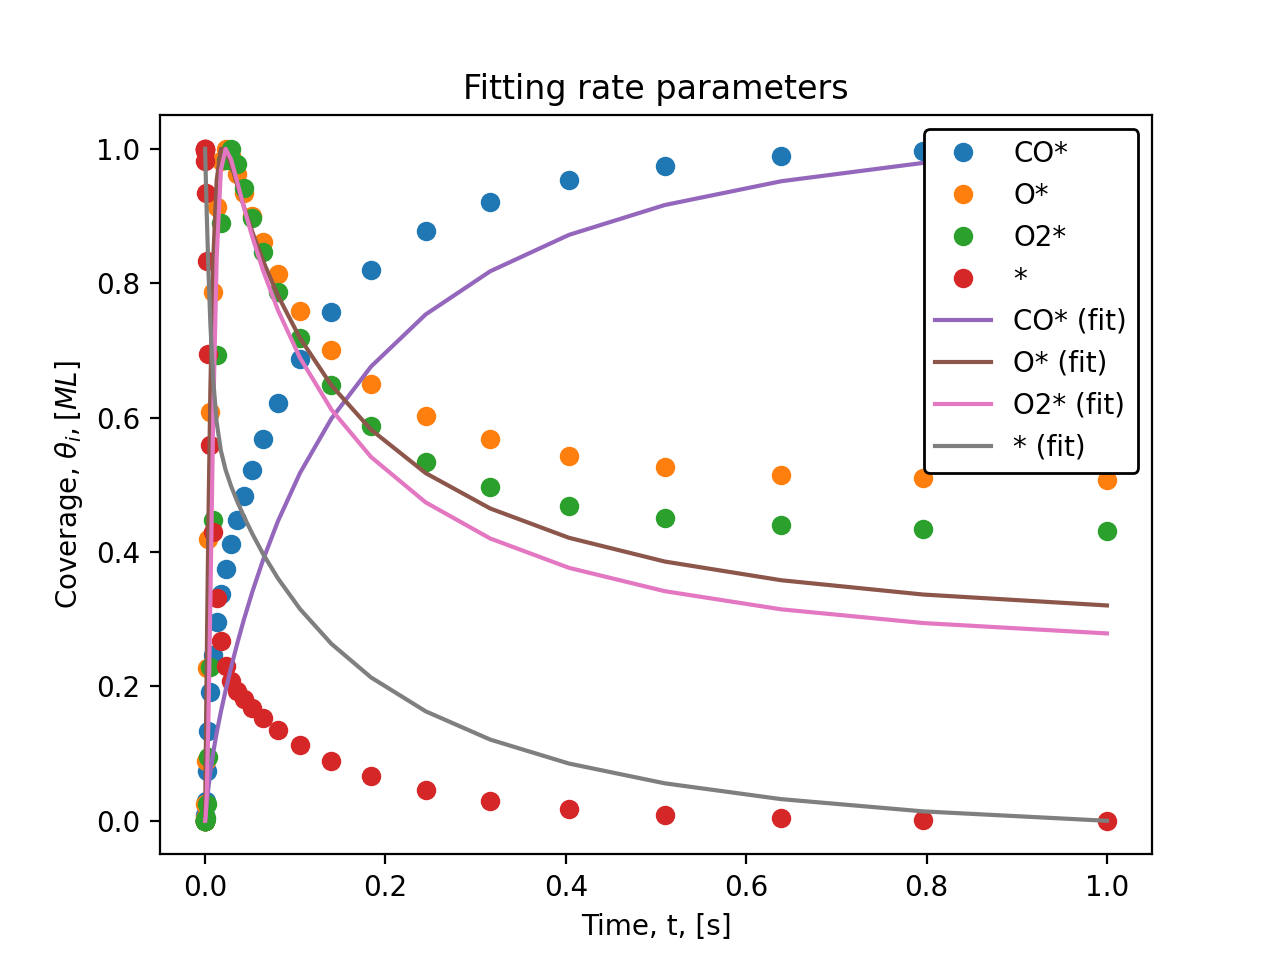

CPU times: user 1.68 s, sys: 27.1 ms, total: 1.71 s
Wall time: 1.73 s


In [8]:
%%time 
#Fitting for Model 1: (without CD) #using ML_RandomForestRegressor
fit1_c_a = Fitting('coverages_1_nCD.csv','Atomic_1.csv','Stoich_1.csv','Param_1_Guess.csv',CovgDep=False) #covgdep = Allowing for coverage dependance to be considered in the fit
t1_c_a,covg1_c_a,fits1_c_a = fit1_c_a.fitting_rate_param(option='ML',mdl='RandomForestRegressor',plot=True) 

Mass is conserved. 


 Initial guess: 

-> Rate Constants:
 [1.e+00 1.e-09 1.e+02 1.e+05 1.e+08 1.e-02 1.e-06 1.e+02]

 Final predictions: 

-> Rate Constants:
 [1.7e+00 1.7e-09 1.7e+02 1.7e+05 1.7e+08 1.7e-02 1.7e-06 1.7e+02]


<IPython.core.display.Javascript object>


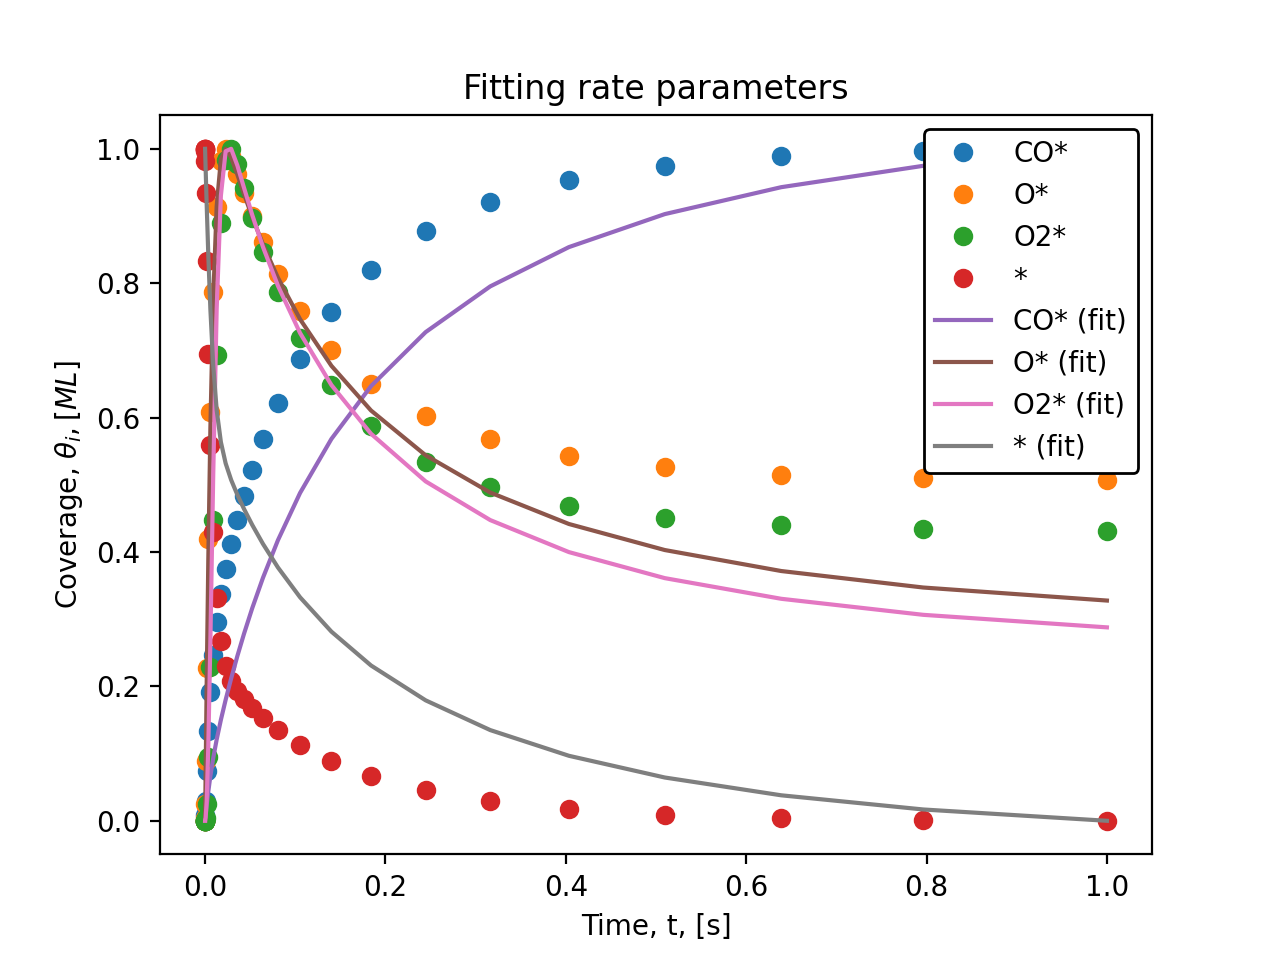

CPU times: user 1.56 s, sys: 17.7 ms, total: 1.58 s
Wall time: 1.56 s


In [9]:
%%time 
#Fitting for Model 1: (without CD) #using KNeighborsRegressor
fit1_c_b = Fitting('coverages_1_nCD.csv','Atomic_1.csv','Stoich_1.csv','Param_1_Guess.csv',CovgDep=False) #covgdep = Allowing for coverage dependance to be considered in the fit
t1_c_b,covg1_c_b,fits1_c_b = fit1_c_b.fitting_rate_param(option='ML',mdl='KNeighborsRegressor',plot=True)

Mass is conserved. 


 Initial guess: 

-> Rate Constants:
 [1.e+00 1.e-09 1.e+02 1.e+05 1.e+08 1.e-02 1.e-06 1.e+02]

 Final predictions: 

-> Rate Constants:
 [2.e+00 2.e-09 2.e+02 2.e+05 2.e+08 2.e-02 2.e-06 2.e+02]


<IPython.core.display.Javascript object>


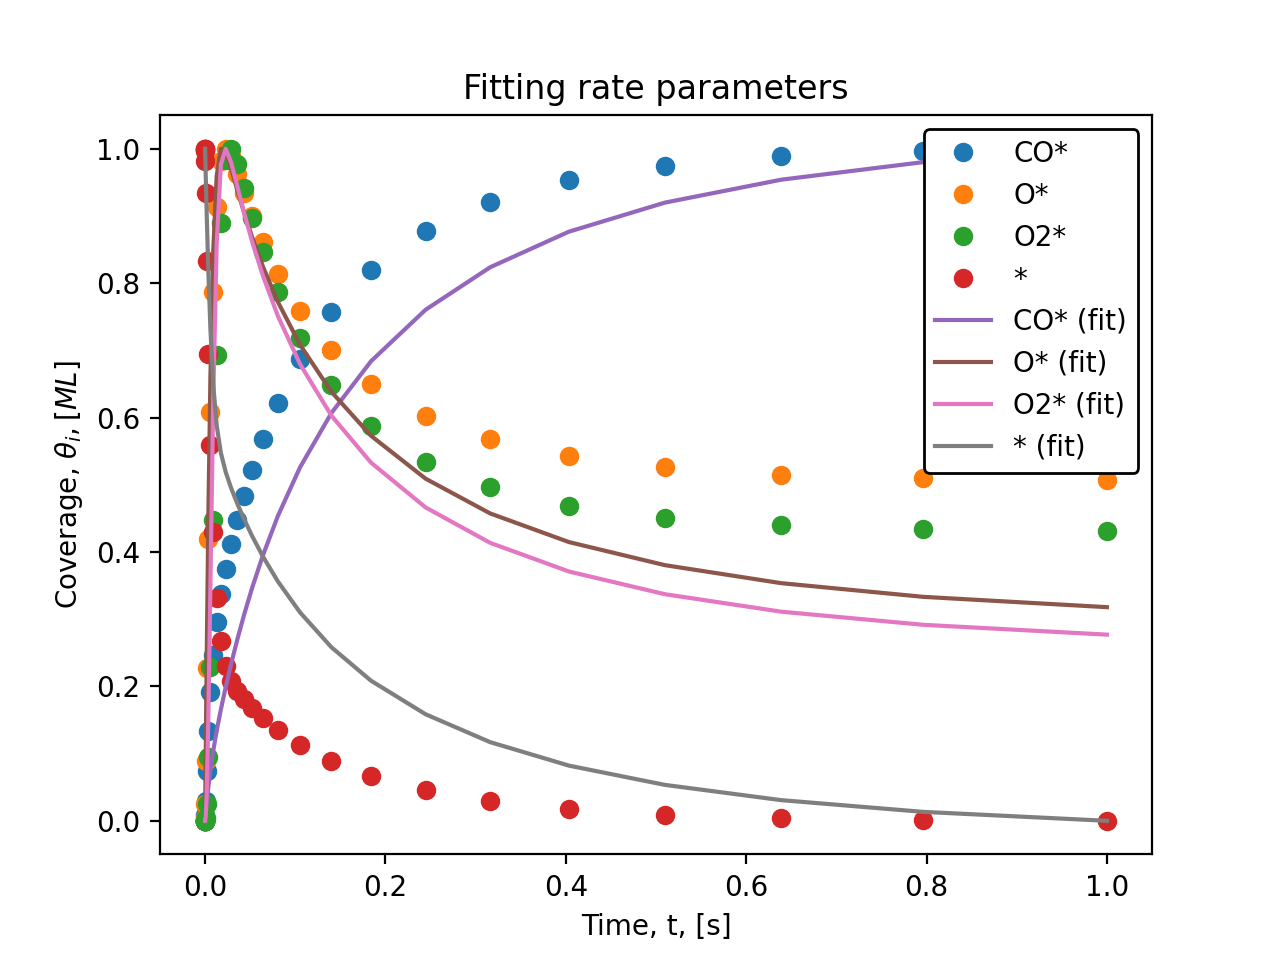

CPU times: user 1.58 s, sys: 14.4 ms, total: 1.59 s
Wall time: 1.58 s


In [10]:
%%time 
#Fitting for Model 1: (without CD) #using DecisionTreeRegressor
fit1_c_c = Fitting('coverages_1_nCD.csv','Atomic_1.csv','Stoich_1.csv','Param_1_Guess.csv',CovgDep=False) #covgdep = Allowing for coverage dependance to be considered in the fit
t1_c_c,covg1_c_c,fits1_c_c = fit1_c_c.fitting_rate_param(option='ML',mdl='DecisionTreeRegressor',plot=True) 

Mass is conserved. 


 Initial guess: 

-> Rate Constants:
 [1.e+00 1.e-09 1.e+02 1.e+05 1.e+08 1.e-02 1.e-06 1.e+02]

 Final predictions: 

-> Rate Constants:
 [1.05000000e+00 1.05000048e-09 1.05000000e+02 1.05000000e+05
 1.05000000e+08 1.05000000e-02 1.05000000e-06 1.05000000e+02]


<IPython.core.display.Javascript object>


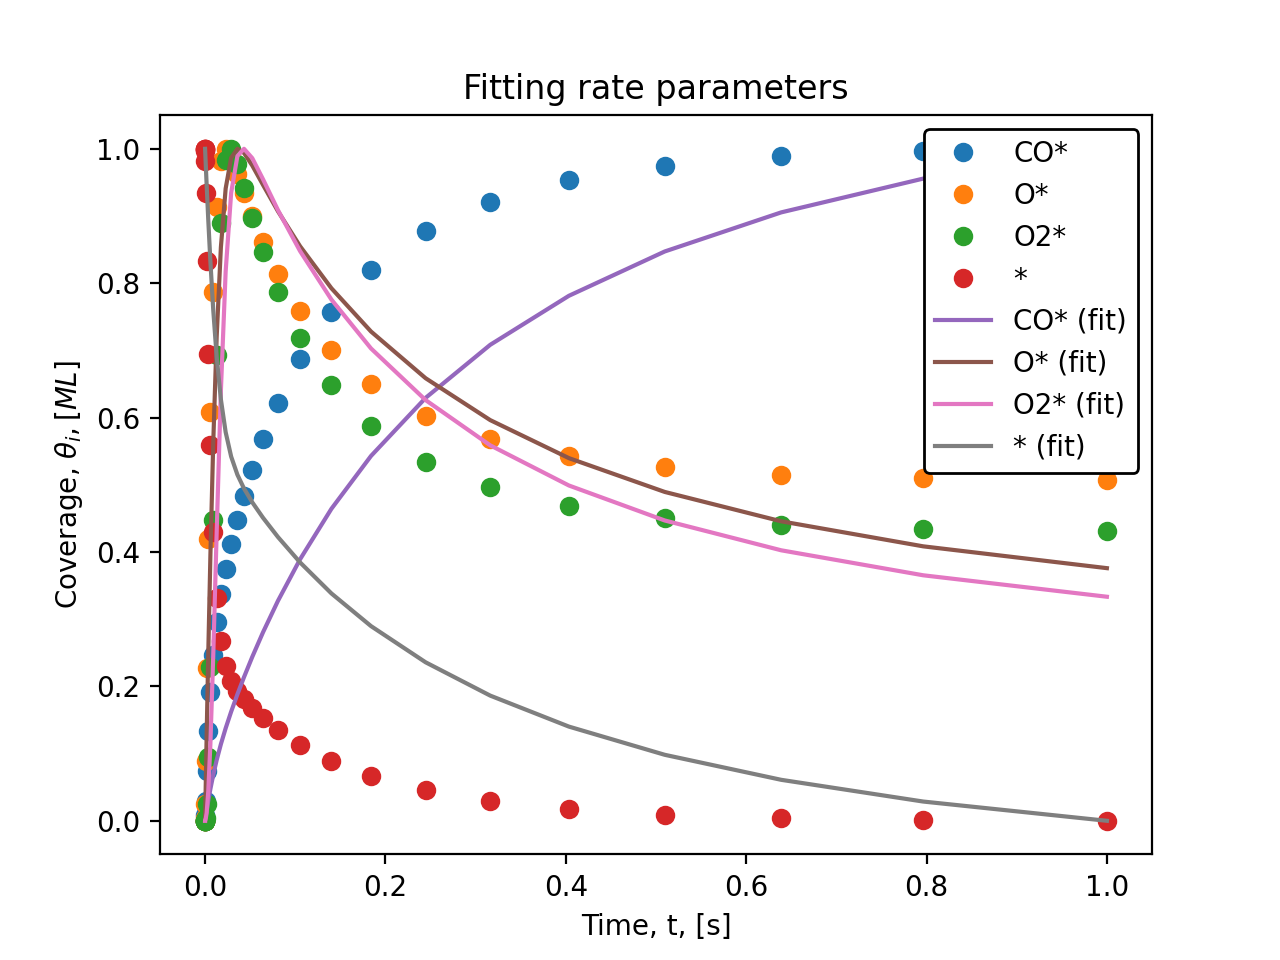

CPU times: user 5.09 s, sys: 4.93 s, total: 10 s
Wall time: 2.73 s


In [11]:
%%time 
#Fitting for Model 1: (without CD) #using MLPRegressor
fit1_c_d = Fitting('coverages_1_nCD.csv','Atomic_1.csv','Stoich_1.csv','Param_1_Guess.csv',CovgDep=False) #covgdep = Allowing for coverage dependance to be considered in the fit
t1_c_d,covg1_c_d,fits1_c_d = fit1_c_d.fitting_rate_param(option='ML',mdl='MLPRegressor',plot=True)

## |--->With CD

## Model 2

***
$\mathbf{\text{Micro Kinetic Model for (a 7 step Redox Mechanism) Water Gas Shift Reaction}}:$<br>
#### [Link to Relevant Paper](https://www.mdpi.com/2673-4583/2/1/11) 
***
$$\require{mhchem}$$       
---
Overall Reaction: 
$$ CO + H_{2}O {\stackrel{\tiny{\textrm{Ni/CeO_2}}}{\rightleftharpoons}} CO_2 + H_2$$
$Ea = -41kJ{mol}^{-1}$
---
Note Reations in the Reaction Mechanism may be reversible or irreversible

Reaction 1:&emsp;Adsorption of $CO$ / Desorption of ${CO}^{*}$

$$ {CO}(g) + * \rightleftharpoons {CO}^{*} $$  <br> 


Reaction 2:&emsp;Adsorption of $H_{2}O$ / Desorption of ${H_{2}O}^{*}$

$$ {H_{2}O}(g) + * \rightleftharpoons {H_{2}O}^{*} $$  <br> 


Reaction 3:&emsp;Dissociation of ${H_{2}O}^*$ / Surface Reaction of ${OH}^{*}$ and $H^*$

$$ {H_{2}O}^* + * \rightleftharpoons {OH}^{*} + H^* $$  <br>


Reaction 4:&emsp;Surface Reaction of ${CO}^{*}$ and ${OH}^*$ / Dissociation of ${COOH}^*$ (1)

$$ {CO}^* + {OH}^* \rightleftharpoons {COOH}^{*} + * $$  <br> 


Reaction 5:&emsp;Dissociation of ${COOH}^*$ (2) / Surface Reaction of ${CO_2}^{*}$ and ${H}^*$

$$ {COOH}^* + * \rightleftharpoons {CO_2}^* + {H}^* $$  <br> 


Reaction 6:&emsp;Desorption of $2H^*$ / Adsorption of $H_2$

$$ 2H^{*} \rightleftharpoons {H_2}(g) + 2^* $$  <br> 


Reaction 7:&emsp;Desorption of ${CO_2}^*$ / Adsorption of ${CO}_2$   

$$ {{CO}_2}^{*} \rightleftharpoons {CO_2}(g) + * $$  <br> 

***
$\mathbf{\text{Modelling Proposed Reaction Mechanism}}:$<br>
***
${{k_i}^j= \textrm{Rate constant/coefficient for reaction i,}} \\  \hspace{0.5cm} \textrm{for j = {f,r} ; where f = forward reaction and r  = the reverse reaction} \\ r_i = \textrm{Rate of reaction for reaction i}$

${\theta_m = \textrm{Surface Coverage of species m}} \\ \sum_{m=1}^{N} \theta_{m} = 1 \\ \hspace{1.3cm} =
\theta_{CO} + \theta_{O_2} + \theta_{O} + \theta_{*}$

### The Atomic/Species Matrix ($\nu$):

The participating species for this surface reaction mechanism are:
1. CO
2. ${H_2}O$
3. $CO_2$
4. $H_2$
5. ${CO}^*$
6. ${{H_2}O}^*$
7. $H^*$
8. ${OH}^*$
9. ${COOH}^*$
10. ${CO_2}^*$
11. *

\begin{equation}
\
\nu=\begin{bmatrix}
    &   CO  &  {H_2}O &   CO_2  &  H_2  &  {CO}^* & {H_2}O^* &   H^* & {OH}^* & {COOH}^* & {CO_2}^* & *\\
H   &   0   &  2      &   0     &  2    &   0     &   2      &   1   &   1    &    1     &    0     & 0\\
C   &   1   &  0      &   1     &  0    &   1     &   0      &   0   &   0    &    1     &    1     & 0\\
O   &   1   &  1      &   2     &  0    &   1     &   1      &   0   &   1    &    2     &    2     & 0\\
*   &   0   &  0      &   0     &  0    &   1     &   1      &   1   &   1    &    1     &    1     & 1\end{bmatrix} 
\
\end{equation}

Atomic Matrix Size : (3x11)
### The Stoichiometric Matrix (A):

\begin{equation}
\
A=\begin{bmatrix}
    &P_{CO}&P_{{H_2}O}& P_{CO_2}&P_{H_2}&\theta_{CO}&\theta_{{H_2}O}&\theta_{H}&\theta_{OH}&\theta_{COOH}&\theta_{{CO}_2}&\theta_*\\
r1  &  -1   &  0       &   0     &  0    &   1       &   0           &   0      &   0    &    0     &    0     &-1\\
r2  &   0   & -1       &   0     &  0    &   0       &   1           &   0      &   0    &    0     &    0     &-1\\
r3  &   0   &  0       &   0     &  0    &   0       &  -1           &   1      &   1    &    0     &    0     &-1\\
r4  &   0   &  0       &   0     &  0    &  -1       &   0           &   0      &  -1    &    1     &    0     & 1\\
r5  &   0   &  0       &   0     &  0    &   0       &   0           &   1      &   0    &   -1     &    1     &-1\\
r6  &   0   &  0       &   0     &  1    &   0       &   0           &  -2      &   0    &    0     &    0     & 2\\
r7  &   0   &  0       &   1     &  0    &   0       &   0           &   0      &   0    &    0     &   -1     & 1\end{bmatrix}  
\
\end{equation}

Stoichiometric Matrix Size : (7x11)

Note:

- For Mass to be conserved:
$$\mathbf{A}\mathbf{\nu = 0}$$

$i =$ species

$j =$ reaction

- To find the Rate of reaction of reaction j:

$$ r_j = k_{j,f} \prod_{i_f} P_{i,f} \theta_{i,f}^{A_{i,j}} - k_{j,r} \prod_{i_r} P_{i,r} \theta_{i,r}^{A_{i,j}}  $$

- To find the Rate of production of species i:
$$R_{\theta_i}=\frac{d\theta_i}{dt} = \sum_j A_{j,i} \cdot r_j $$

#### Therefore:

Rate Equations:&emsp;

$$r_1 = k_{1}^f \cdot \textrm{P}_{CO} \cdot \theta_{*} - k_{1}^r \cdot \theta_{CO} $$

$$r_2 = k_{2}^f \cdot \textrm{P}_{{H_2}O} \cdot \theta_{*} - k_{2}^r \cdot \theta_{{H_2}O} $$

$$r_3 = k_{3}^f \cdot \theta_{{H_2}O} \cdot \theta_{*} - k_{3}^r \cdot \theta_{OH} \cdot \theta_{H}$$

$$r_4 = k_{4}^f \cdot \theta_{CO} \cdot \theta_{OH} - k_{4}^r \cdot \theta_{COOH} \cdot \theta_{*} $$

$$r_5 = k_{5}^f \cdot \theta_{COOH} \cdot \theta_{*} - k_{5}^r \cdot \theta_{{CO}_2} \cdot \theta_{H}$$

$$r_6 = k_{6}^f \cdot \theta_{H}^2   - k_{6}^r \cdot \textrm{P}_{H_2} \cdot \theta_{*}^2 $$

$$r_7 = k_{7}^f \cdot \theta_{{CO}_2}  - k_{7}^r \cdot \textrm{P}_{{CO}_2} \cdot \theta_{*}$$

The Corresponding Differential Equations corresponding to the rate of formations/productions of the different coverages:

$$R_{\theta_{CO}} = \frac{d\theta_{CO}}{dt} = r_1 - r_4$$

$$R_{\theta_{{H_2}O}} = \frac{d\theta_{{H_2}O}}{dt} = r_2 - r_3 $$

$$R_{\theta_{H}} = \frac{d\theta_{H}}{dt} = r_3 + r_5 - 2 r_6 $$

$$R_{\theta_{OH}} = \frac{d\theta_{OH}}{dt} = r_3 - r_4 $$

$$R_{\theta_{COOH}} = \frac{d\theta_{COOH}}{dt} = r_4 - r_5 $$

$$R_{\theta_{{CO}_2}} = \frac{d\theta_{{CO}_2}}{dt} = r_5 - r_7 $$

$$R_{\theta_{*}} = \frac{d\theta_{*}}{dt} = r_7 + 2 r_6 + r_4 - r_6 - r_3 - r_2 - r_1 $$



## |--->Without CD

Mass is conserved. 


 Initial guess: 

-> Rate Constants:
 [1.e+11 1.e+11 1.e+11 1.e+10 1.e+13 1.e+14 1.e+10 1.e+05 1.e+13 1.e+14
 1.e+10 1.e+08 1.e+12 1.e+11]

 Final predictions: 

-> Rate Constants:
 [2.12063866e+08 1.01873549e+04 2.43321226e+11 2.70363961e+13
 3.58398132e+12 1.86750612e+12 9.56959860e+11 2.74281179e+12
 1.38304821e+13 3.78503947e+12 9.57091633e+10 1.98367173e+09
 4.58967000e+11 1.39448986e+12]


<IPython.core.display.Javascript object>


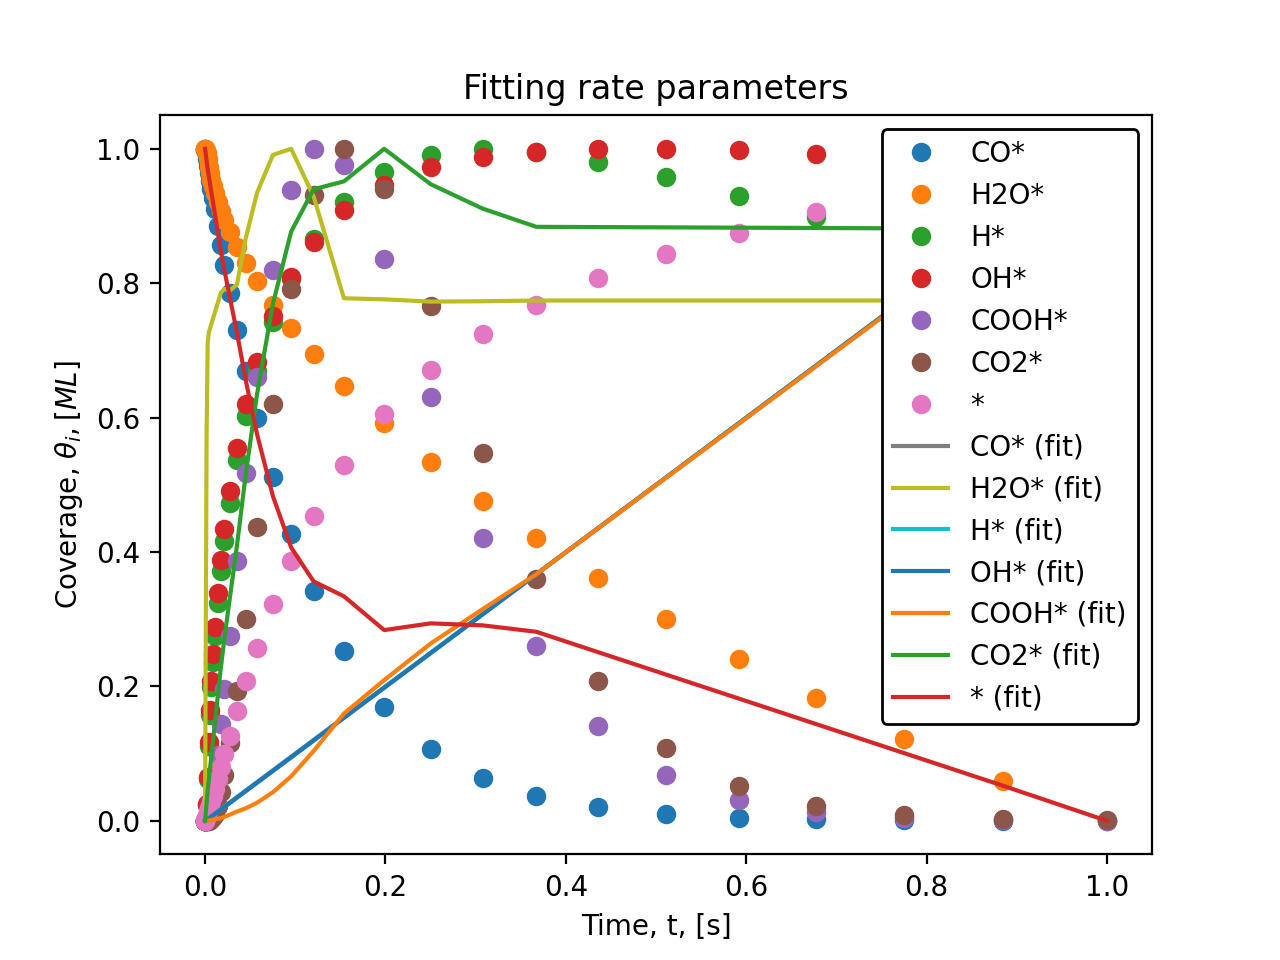

CPU times: user 48.8 s, sys: 4.82 s, total: 53.6 s
Wall time: 31.3 s


In [12]:
%%time 
#Fitting for Model 2: (without CD) #using curve fit
fit2_a = Fitting('coverages_2_nCD.csv','Atomic_2.csv','Stoich_2.csv','Param_2_Guess.csv',CovgDep=False) #covgdep = Allowing for coverage dependance to be considered in the fit
t2_a,covg2_a,fits2_a = fit2_a.fitting_rate_param(option='cf',plot=True,maxfev=1e10,xtol=1e-15,ftol=1e-15) #cf stands for curve fit

Mass is conserved. 



/Users/klkusima/Desktop/RASH Research/CO_ox/Kinetics/OOP_Kinetics/OOP/Model Testings/main.py:1042: RuntimeWarning: invalid value encountered in true_divide
  Norm_inp[:,i]=(Ext_inp[:,i]-mi)/(ma-mi)



 Initial guess: 

-> Rate Constants:
 [1.e+11 1.e+11 1.e+11 1.e+10 1.e+13 1.e+14 1.e+10 1.e+05 1.e+13 1.e+14
 1.e+10 1.e+08 1.e+12 1.e+11]

 Final predictions: 

-> Rate Constants:
 [6.82111151e+09 4.60537889e+11 2.08771694e+07 9.51669022e+07
 9.98594679e+12 9.99999999e+13 9.02777633e+09 1.00000000e+05
 1.00001141e+13 1.00000000e+14 1.00000000e+10 9.75712053e+07
 8.38753479e+11 2.85237669e+09]


<IPython.core.display.Javascript object>


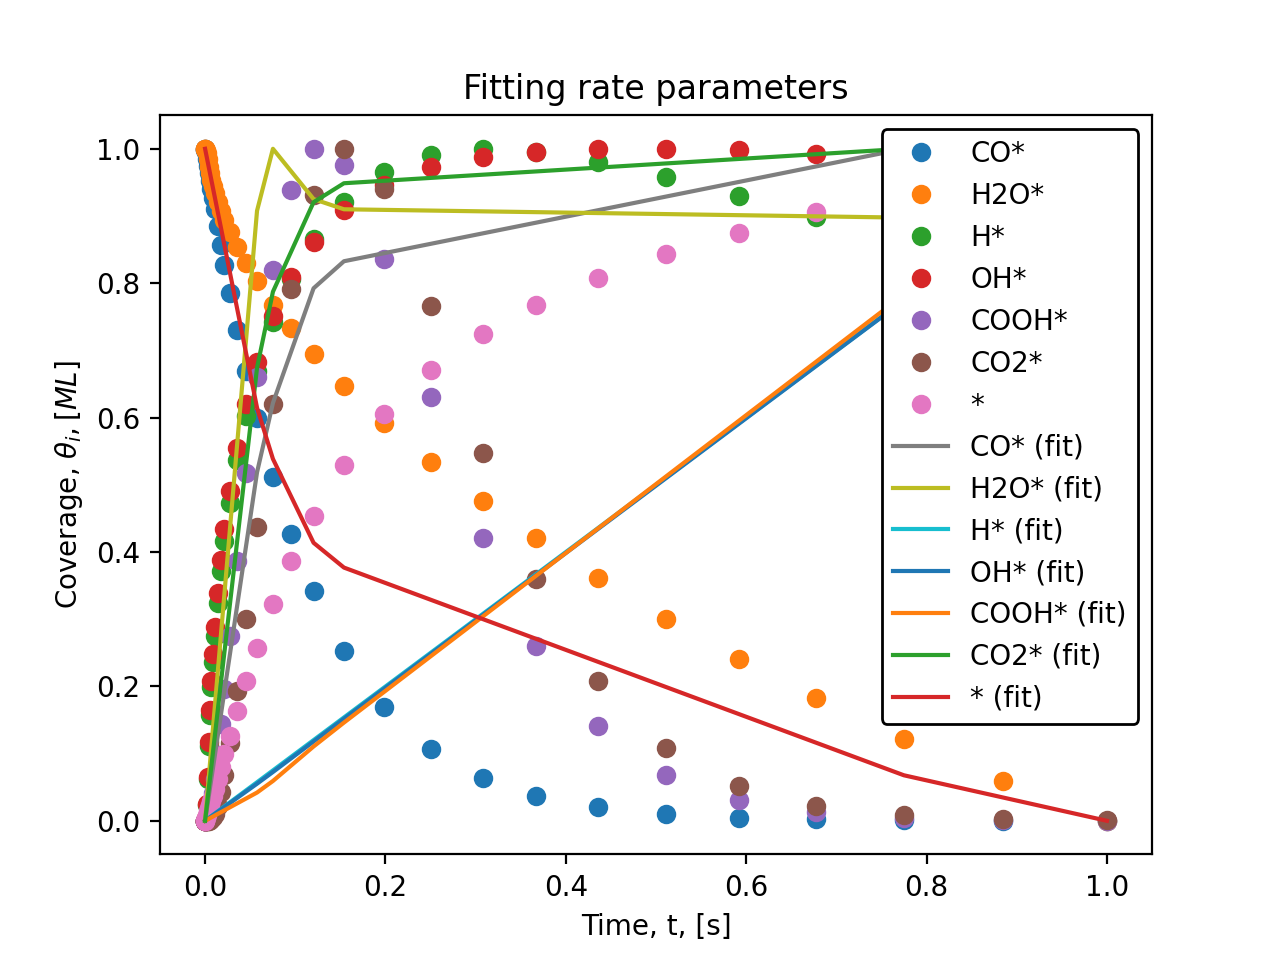

CPU times: user 1min 19s, sys: 317 ms, total: 1min 19s
Wall time: 1min 19s


In [13]:
%%time 
#Fitting for Model 2: (without CD) #using function minizer
fit2_b = Fitting('coverages_2_nCD.csv','Atomic_2.csv','Stoich_2.csv','Param_2_Guess.csv',CovgDep=False) #covgdep = Allowing for coverage dependance to be considered in the fit
t2_b,covg2_b,fits2_b = fit2_b.fitting_rate_param(option='min',plot=True,weight=1e20,gtol=1e-12,maxfun=1e5,maxiter=1e5) #min stands for minimize

Mass is conserved. 


 Initial guess: 

-> Rate Constants:
 [1.e+11 1.e+11 1.e+11 1.e+10 1.e+13 1.e+14 1.e+10 1.e+05 1.e+13 1.e+14
 1.e+10 1.e+08 1.e+12 1.e+11]

 Final predictions: 

-> Rate Constants:
 [1.262e+11 1.262e+11 1.262e+11 1.262e+10 1.262e+13 1.262e+14 1.262e+10
 1.262e+05 1.262e+13 1.262e+14 1.262e+10 1.262e+08 1.262e+12 1.262e+11]


<IPython.core.display.Javascript object>


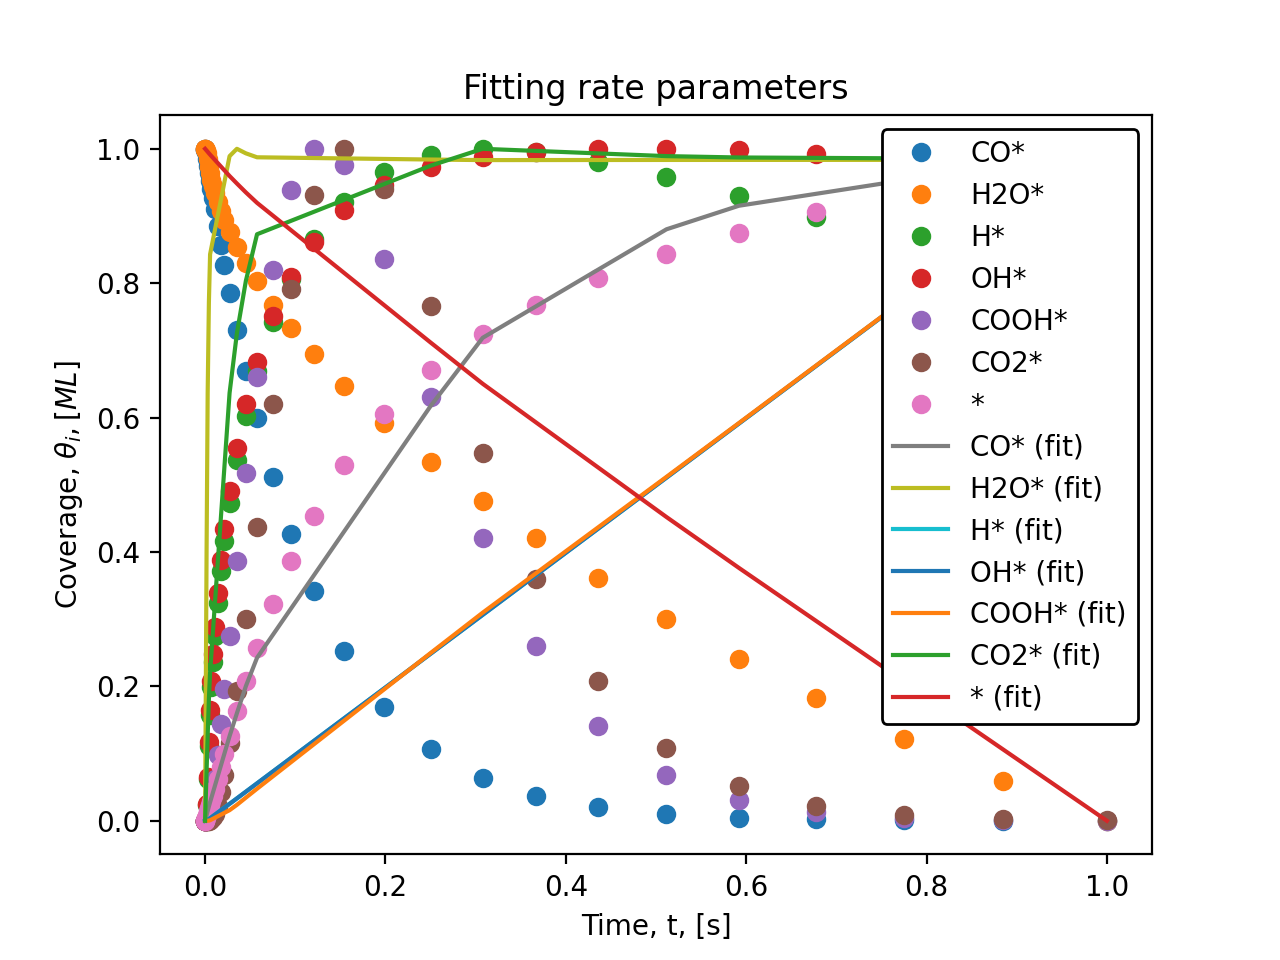

CPU times: user 37.6 s, sys: 126 ms, total: 37.8 s
Wall time: 37.7 s


In [14]:
%%time 
#Fitting for Model 2: (without CD) #using ML_RandomForestRegressor
fit2_c_a = Fitting('coverages_2_nCD.csv','Atomic_2.csv','Stoich_2.csv','Param_2_Guess.csv',CovgDep=False) #covgdep = Allowing for coverage dependance to be considered in the fit
t2_c_a,covg2_c_a,fits2_c_a = fit2_c_a.fitting_rate_param(option='ML',mdl='RandomForestRegressor',plot=True) 

Mass is conserved. 


 Initial guess: 

-> Rate Constants:
 [1.e+11 1.e+11 1.e+11 1.e+10 1.e+13 1.e+14 1.e+10 1.e+05 1.e+13 1.e+14
 1.e+10 1.e+08 1.e+12 1.e+11]

 Final predictions: 

-> Rate Constants:
 [1.7e+11 1.7e+11 1.7e+11 1.7e+10 1.7e+13 1.7e+14 1.7e+10 1.7e+05 1.7e+13
 1.7e+14 1.7e+10 1.7e+08 1.7e+12 1.7e+11]


<IPython.core.display.Javascript object>


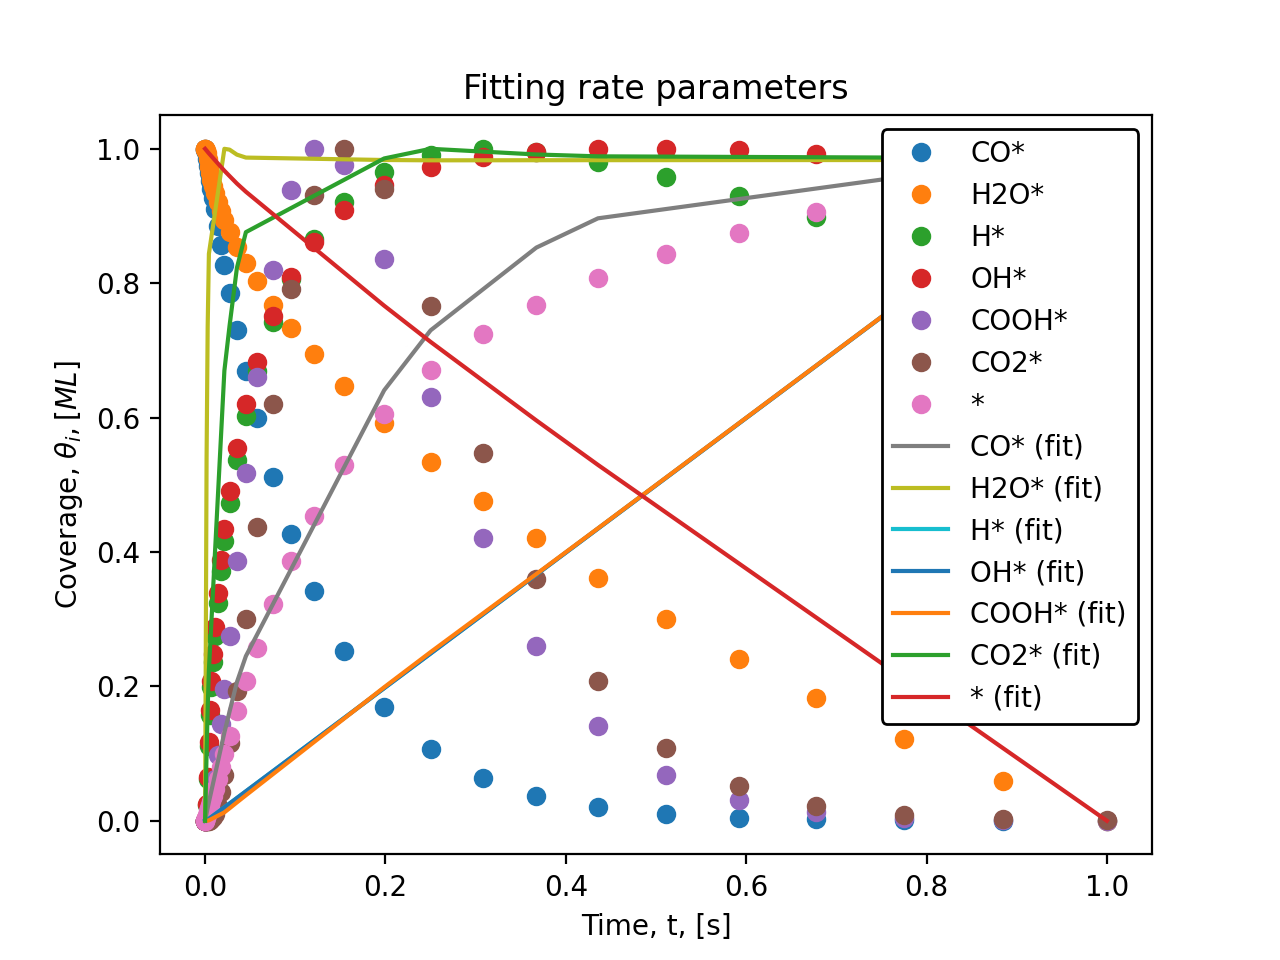

CPU times: user 37.6 s, sys: 126 ms, total: 37.7 s
Wall time: 37.7 s


In [15]:
%%time 
#Fitting for Model 2: (without CD) #using KNeighborsRegressor
fit2_c_b = Fitting('coverages_2_nCD.csv','Atomic_2.csv','Stoich_2.csv','Param_2_Guess.csv',CovgDep=False) #covgdep = Allowing for coverage dependance to be considered in the fit
t2_c_b,covg2_c_b,fits2_c_b = fit2_c_b.fitting_rate_param(option='ML',mdl='KNeighborsRegressor',plot=True)

Mass is conserved. 


 Initial guess: 

-> Rate Constants:
 [1.e+11 1.e+11 1.e+11 1.e+10 1.e+13 1.e+14 1.e+10 1.e+05 1.e+13 1.e+14
 1.e+10 1.e+08 1.e+12 1.e+11]

 Final predictions: 

-> Rate Constants:
 [2.e+11 2.e+11 2.e+11 2.e+10 2.e+13 2.e+14 2.e+10 2.e+05 2.e+13 2.e+14
 2.e+10 2.e+08 2.e+12 2.e+11]


<IPython.core.display.Javascript object>


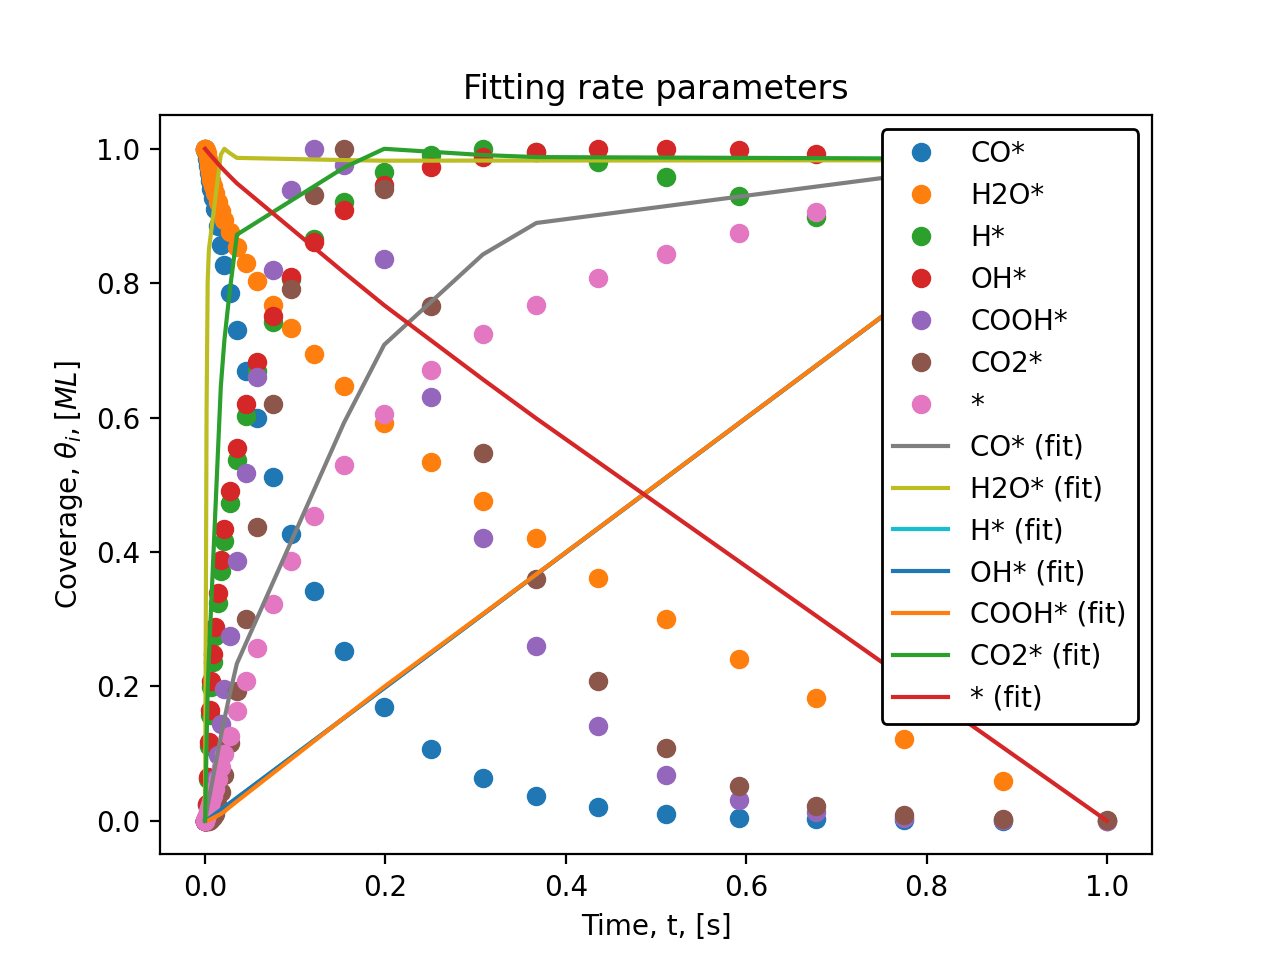

CPU times: user 37.7 s, sys: 163 ms, total: 37.9 s
Wall time: 37.9 s


In [16]:
%%time 
#Fitting for Model 2: (without CD) #using DecisionTreeRegressor
fit2_c_c = Fitting('coverages_2_nCD.csv','Atomic_2.csv','Stoich_2.csv','Param_2_Guess.csv',CovgDep=False) #covgdep = Allowing for coverage dependance to be considered in the fit
t2_c_c,covg2_c_c,fits2_c_c = fit2_c_c.fitting_rate_param(option='ML',mdl='DecisionTreeRegressor',plot=True) 

Mass is conserved. 


 Initial guess: 

-> Rate Constants:
 [1.e+11 1.e+11 1.e+11 1.e+10 1.e+13 1.e+14 1.e+10 1.e+05 1.e+13 1.e+14
 1.e+10 1.e+08 1.e+12 1.e+11]

 Final predictions: 

-> Rate Constants:
 [1.05e+11 1.05e+11 1.05e+11 1.05e+10 1.05e+13 1.05e+14 1.05e+10 1.05e+05
 1.05e+13 1.05e+14 1.05e+10 1.05e+08 1.05e+12 1.05e+11]


<IPython.core.display.Javascript object>


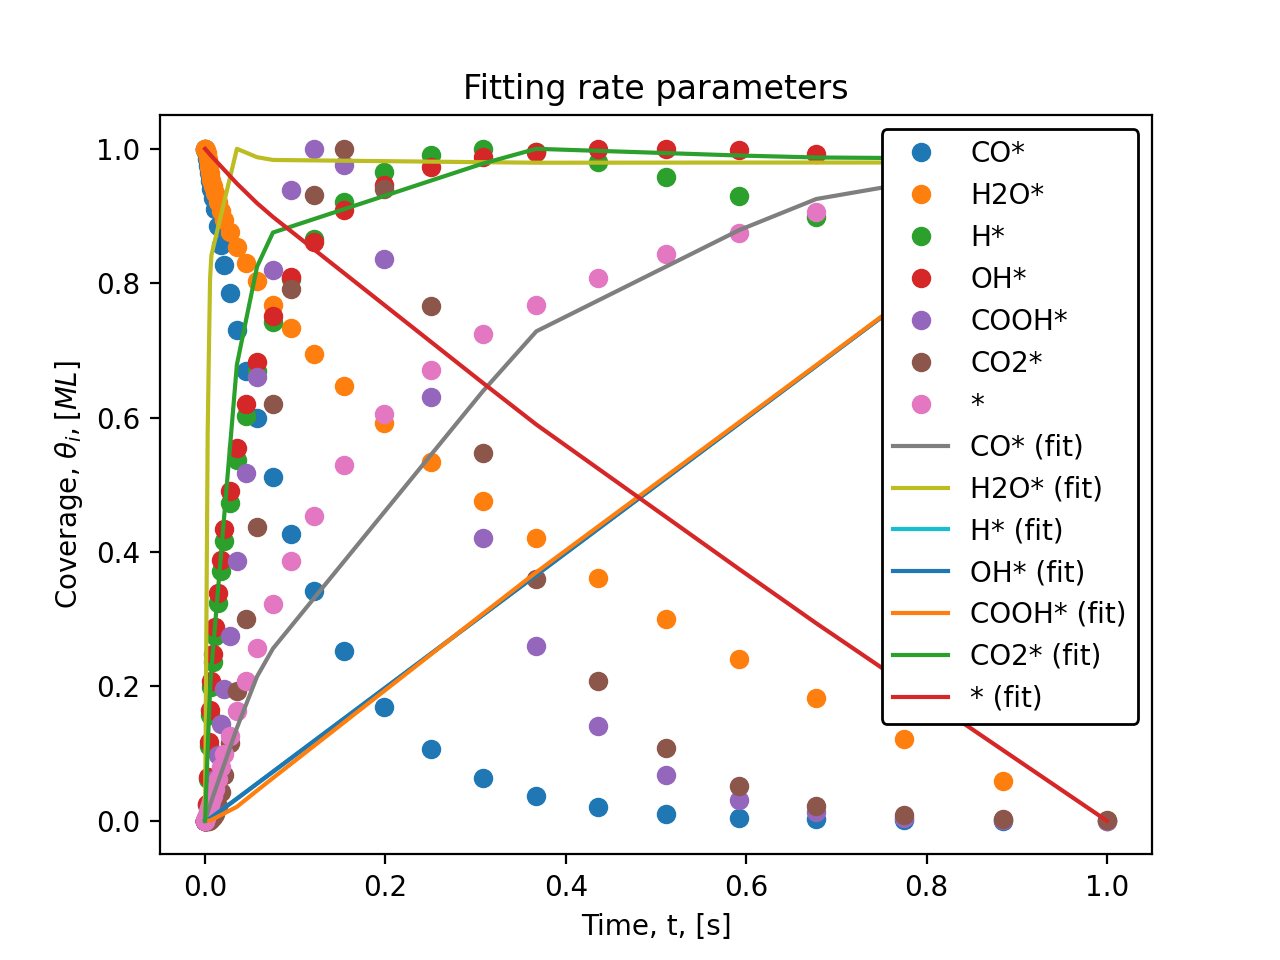

CPU times: user 1min 39s, sys: 1min 5s, total: 2min 45s
Wall time: 56.6 s


In [17]:
%%time 
#Fitting for Model 2: (without CD) #using MLPRegressor
fit2_c_d = Fitting('coverages_2_nCD.csv','Atomic_2.csv','Stoich_2.csv','Param_2_Guess.csv',CovgDep=False) #covgdep = Allowing for coverage dependance to be considered in the fit
t2_c_d,covg2_c_d,fits2_c_d = fit2_c_d.fitting_rate_param(option='ML',mdl='MLPRegressor',plot=True)

## |--->With CD